In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

plt.rcParams['figure.figsize'] = (7, 3.5)
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
fir_taps = 0  # for polarization.f32
# fir_taps = 1445  # for polarization_avg.f32
x = np.fromfile('polarization.f32', 'float32')

In [3]:
corr = scipy.signal.correlate(x, x, mode='full')
lag = np.arange(-x.size+1, x.size)

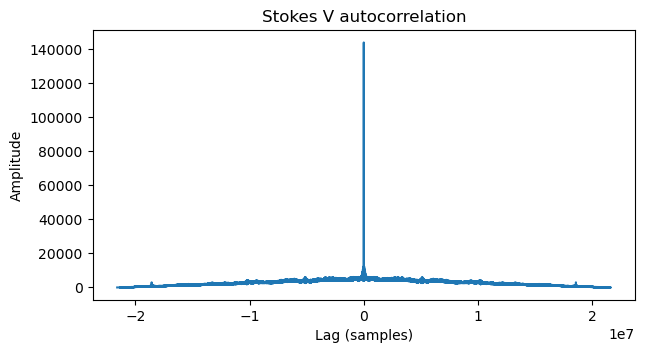

In [4]:
plt.plot(lag, corr)
plt.title('Stokes V autocorrelation')
plt.xlabel('Lag (samples)')
plt.ylabel('Amplitude');

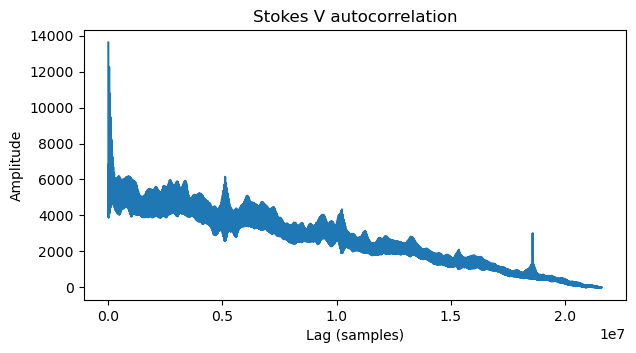

In [5]:
sel = slice(corr.size//2 + 20, None)
plt.plot(lag[sel], corr[sel])
plt.title('Stokes V autocorrelation')
plt.xlabel('Lag (samples)')
plt.ylabel('Amplitude');

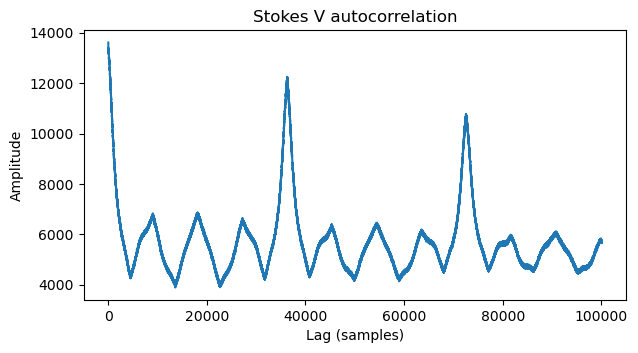

In [6]:
sel = slice(corr.size//2 + 20, corr.size//2 + 20 + 100000)
plt.plot(lag[sel], corr[sel])
plt.title('Stokes V autocorrelation')
plt.xlabel('Lag (samples)')
plt.ylabel('Amplitude');

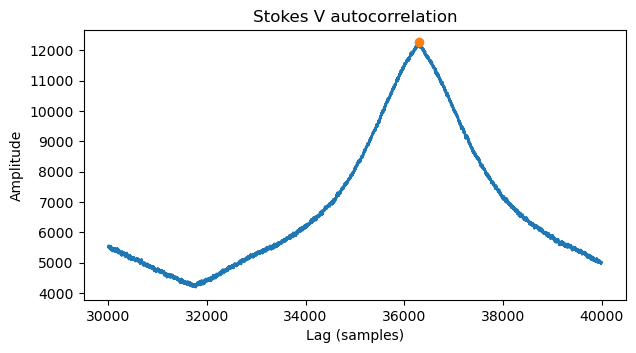

In [7]:
sel = slice(corr.size//2 + 30000, corr.size//2 + 30000 + 10000)
a = lag[sel][np.argmax(corr[sel])]
plt.plot(lag[sel], corr[sel])
plt.plot(a, np.max(corr[sel]), 'o')
plt.title('Stokes V autocorrelation')
plt.xlabel('Lag (samples)')
plt.ylabel('Amplitude');

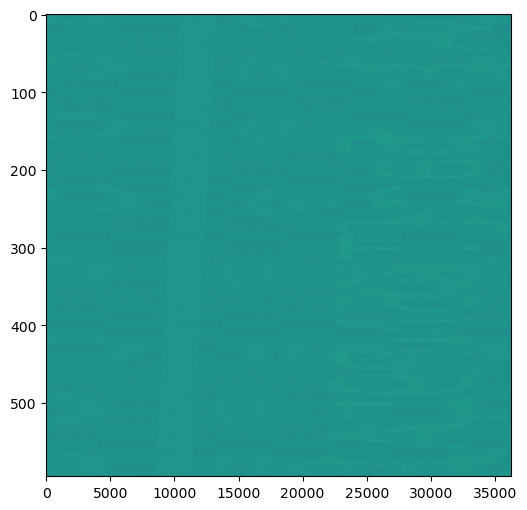

In [8]:
z = x[:x.size//a*a].reshape(-1, a)
plt.figure(figsize=(6, 6))
plt.imshow(z, aspect='auto');

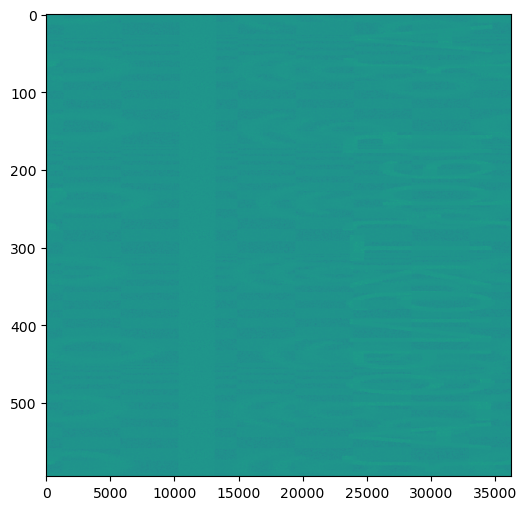

In [9]:
b = a - 3
b = 36290 - 3
z = x[:x.size//b*b].reshape(-1, b)
plt.figure(figsize=(6, 6))
plt.imshow(z, aspect='auto');

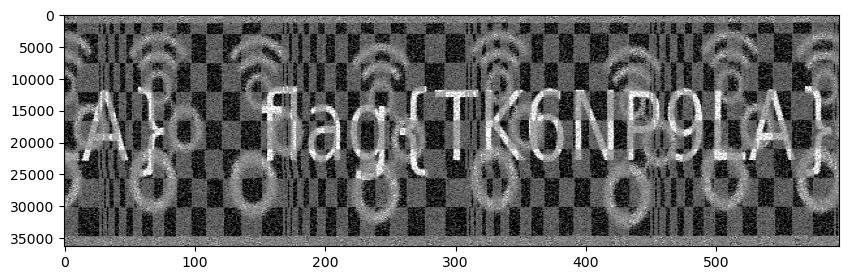

In [10]:
z = x[:x.size//b*b].reshape(-1, b)
plt.figure(figsize=(10, 3))
plt.imshow(np.roll(z.T, -12000, axis=0),
           aspect='auto', cmap='gray',
           vmin=-0.05, vmax=0.05);

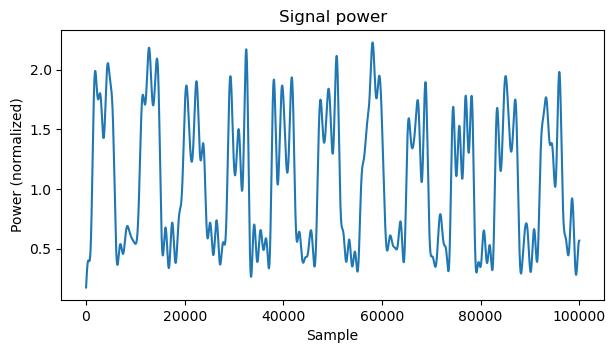

In [11]:
fir_taps_pwr = 579
fir_taps_pwr2 = 14455
delay_difference = (fir_taps_pwr-1) // 2 + (fir_taps_pwr2-1) // 2 - (fir_taps-1) // 2
pwr = np.fromfile('power.f32', 'float32')[delay_difference:]
pwr /= np.average(pwr)
plt.plot(pwr[:100000])
plt.title('Signal power')
plt.ylabel('Power (normalized)')
plt.xlabel('Sample');

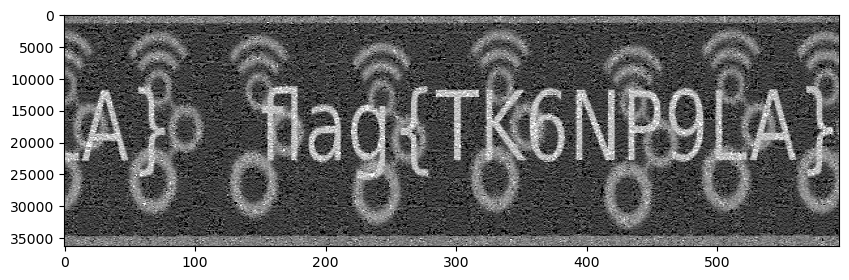

In [12]:
w = x[:pwr.size]/pwr
w = w[:w.size//b*b].reshape(-1, b)
plt.figure(figsize=(10, 3))
plt.imshow(np.roll(w.T, -12000, axis=0),
           aspect='auto', cmap='gray',
           vmin=-0.05, vmax=0.05);